# Hyperparameters Tuning

__The dataset__

The dataset relate to credit card defaults.
It contains variables related to the financial history of some consumers in Taiwan. It was 30,000 users and 24 attributes.

Our modeling target is wheter they defaulted on their loan.

is has already been preprocessed and ot times we will take smaller samples to demonstrate a concept.

`https://archive.ics.uci.edu/ml/datasets/default-of-credit-card-clients`


In [41]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [42]:
data = pd.read_excel('../TreeBasedModels/data/default of credit card clients.xls',
                     header=1,
                     index_col=0)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [43]:
# length of rows and columns
print(data.shape)

(30000, 24)


In [44]:
# data types
print(data.dtypes)


LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [45]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [46]:
# check for missing values
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [47]:
# Attributes are from column 1 to 24
X = data.iloc[:, 1:24]
y = data['default payment next month']

In [48]:
# Targets are the last column
y.value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__What is a parameter?__

- Component of the model learned during the modeling process.
- You don't set three manually (you can't in fact), The algotihm will discover these for you.


### Parameters in Logistic Regression

In [50]:
# A simple logistic regression model:
log_reg_clf = LogisticRegression()

log_reg_clf.fit(X_train, y_train)

print(log_reg_clf.coef_)

[[-1.25860093e-03 -1.35582542e-03 -1.19855622e-03 -2.52911659e-02
   1.00161246e-03  1.00038801e-03  9.48050547e-04  9.56233272e-04
   9.22481616e-04  9.04857217e-04 -1.05068126e-05  6.64965682e-06
   2.72915792e-06  1.52427946e-08  2.14691086e-06  2.20426736e-06
  -3.11141078e-05 -2.64964386e-05 -1.05770634e-05 -1.10444872e-05
  -7.47416287e-06 -6.63982910e-06  1.09465757e-03]]


/Users/gblasd/Documents/Code/EsembleML/ensembleml/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Tidy up the coefficients

In [51]:
# Get the original variable names
original_variables = list(X_train.columns)

# Zip together the names and coefficients
zipped_together = zip(original_variables, log_reg_clf.coef_[0])
coefs = [list(x) for x in zipped_together]

# Put into a DataFrame with column labels
coefs = pd.DataFrame(coefs, columns=["Variable", "Coefficient"])
print(coefs)

                      Variable   Coefficient
0                          SEX -1.258601e-03
1                    EDUCATION -1.355825e-03
2                     MARRIAGE -1.198556e-03
3                          AGE -2.529117e-02
4                        PAY_0  1.001612e-03
5                        PAY_2  1.000388e-03
6                        PAY_3  9.480505e-04
7                        PAY_4  9.562333e-04
8                        PAY_5  9.224816e-04
9                        PAY_6  9.048572e-04
10                   BILL_AMT1 -1.050681e-05
11                   BILL_AMT2  6.649657e-06
12                   BILL_AMT3  2.729158e-06
13                   BILL_AMT4  1.524279e-08
14                   BILL_AMT5  2.146911e-06
15                   BILL_AMT6  2.204267e-06
16                    PAY_AMT1 -3.111411e-05
17                    PAY_AMT2 -2.649644e-05
18                    PAY_AMT3 -1.057706e-05
19                    PAY_AMT4 -1.104449e-05
20                    PAY_AMT5 -7.474163e-06
21        

Now sort and print the top of top three coefficients

In [52]:
coefs.sort_values(by="Coefficient", inplace=True, ascending=False)
print(coefs.head(3))

                      Variable  Coefficient
22  default payment next month     0.001095
4                        PAY_0     0.001002
5                        PAY_2     0.001000


### Parameters in Random Forest

What about tree based algorithms? 

Random Forest has no coefficients, but node decisions (what feature and what values to split on).

In [79]:
from sklearn.ensemble import RandomForestClassifier

# A simple random forest estimator
rf_clf = RandomForestClassifier(max_depth=3)
rf_clf.fit(X_train, y_train)

# Pull out one tree from the forest
chosen_tree = rf_clf.estimators_[7]

In [80]:
rf_clf

RandomForestClassifier(max_depth=3)

In [81]:
rf_clf.feature_importances_

array([0.00000000e+00, 4.98647229e-04, 5.83708340e-05, 5.21726568e-05,
       1.57243926e-01, 8.10525558e-02, 6.17885889e-02, 6.99763094e-02,
       2.51455979e-02, 2.05673664e-02, 1.12413190e-03, 1.90547838e-03,
       2.35215971e-03, 8.11676204e-04, 7.30336238e-04, 3.32105993e-04,
       1.65302920e-02, 1.28203751e-02, 4.27156158e-03, 6.15370121e-03,
       1.36090907e-03, 3.83587298e-03, 5.31387864e-01])

In [82]:
rf_clf.feature_names_in_

array(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'], dtype=object)

In [83]:
rf_clf.estimator_

DecisionTreeClassifier()

In [84]:
rf_clf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=634495702),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=405783286),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1381936359),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=332331841),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=991003519),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=26767693),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1944622610),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=529903813),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=283929686),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1872841364),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=541003279),
 DecisionTree

In [85]:
rf_clf.estimators_[7]

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=529903813)

In [86]:
chosen_tree

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=529903813)

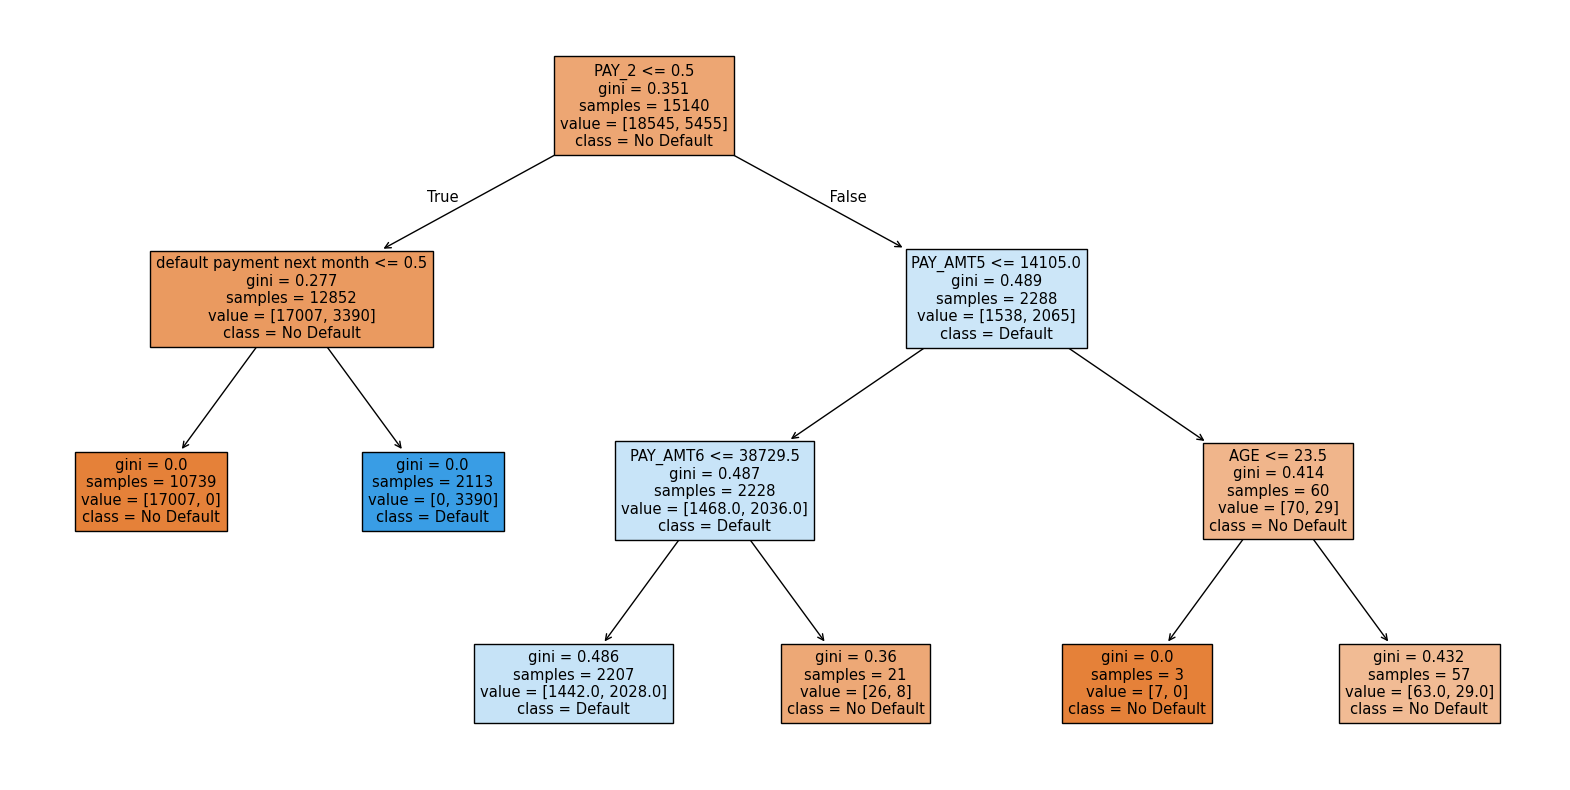

In [87]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(chosen_tree, 
          feature_names=X.columns, 
          class_names=['No Default', 'Default'], 
          filled=True)
plt.show()

__Extracting Node Decisions__

We can pull out details of the left, second-from-to node:

In [96]:
# Get the column it split on
split_column = chosen_tree.tree_.feature[1]
split_column_name = X.columns[split_column]

# Get the value ot split it
split_value = chosen_tree.tree_.threshold[1]

print("This node split on feature {} at value {}"
      .format(split_column_name, split_value))

This node split on feature default payment next month at value 0.5
